In [53]:
import pandas as pd
df_AA=pd.read_csv('df_AG--RotationEncodingBL62.txt_EncodingMatrix.txt', sep="\t", header=None)
df_BB=pd.read_csv('df_BG--RotationEncodingBL62.txt_EncodingMatrix.txt', sep="\t", header=None)
df_AB=pd.read_csv('df_AB--RotationEncodingBL62.txt_EncodingMatrix.txt', sep="\t", header=None)

In [54]:
print(len(df_AA))   
print(len(df_BB))
print(len(df_AB))

2232
5451
2225


In [55]:
import numpy as np

df_BB = df_BB[df_BB.iloc[:, 3] == 'HomoSapiens']
print(len(df_BB))
# df_BB = df_BB[df_BB.iloc[:, 12] > 0]
data_BB_human = df_BB.iloc[:,5:]
labels = pd.factorize(df_BB.iloc[:, 4])[0]
print(len(labels))
data_beta_human = data_BB_human.to_numpy()

4412
4412


Before UMAP: (4412, 96)
After UMAP: (4412, 2)


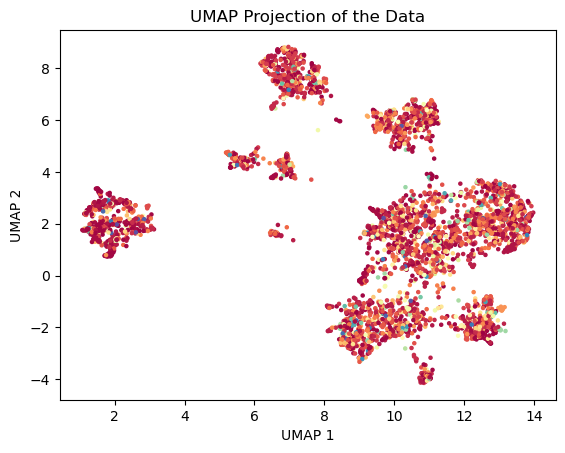

In [56]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
print("Before UMAP:", np.shape(data_beta_human)) 

# 使用UMAP降维
embedding = reducer.fit_transform(data_beta_human)
print("After UMAP:", np.shape(embedding))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=labels, cmap='Spectral')
plt.title('Human Beta')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [30]:
import numpy as np

df_AA = df_AA[df_AA.iloc[:, 3] == 'HomoSapiens']
# df_BB = df_BB[df_BB.iloc[:, 12] > 0]
data_AA_human = df_AA.iloc[:,5:]
labels = pd.factorize(df_AA.iloc[:, 4])[0]
data_alpha_human = data_AA_human.to_numpy()
print(np.shape(data_alpha_human))

(1627, 96)


Before UMAP: (1627, 96)
After UMAP: (1627, 2)


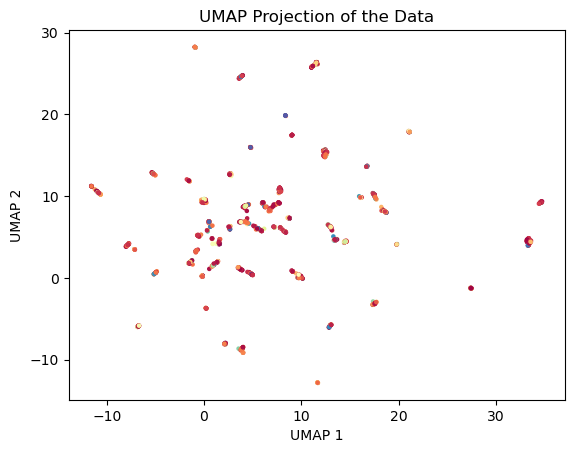

In [31]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt


reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
print("Before UMAP:", np.shape(data_alpha_human))  # 确认降维前的数据形状
# 使用UMAP降维
embedding = reducer.fit_transform(data_alpha_human)
print("After UMAP:", np.shape(embedding))  # 确认降维后的数据形状
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=labels, cmap='Spectral')
plt.title('Human alpha')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [49]:
import numpy as np
df_AB = df_AB[df_AB.iloc[:, 6] == 'HomoSapiens']
print(np.shape(df_AB))
data_AB_human = df_AB.iloc[:,14:]
labels, unique_values = pd.factorize(df_AB.iloc[:, 10])
print(labels)
mapping_dict = {i: val for i, val in enumerate(unique_values)}
print(mapping_dict[labels[0]])
data_ab_human = data_AB_human.to_numpy()
print(np.shape(data_ab_human))


(1996, 110)
[ 0  1  1 ... 24  0  1]
YLQPRTFLL
(1996, 96)


Before UMAP: (1996, 96)
After UMAP: (1996, 2)


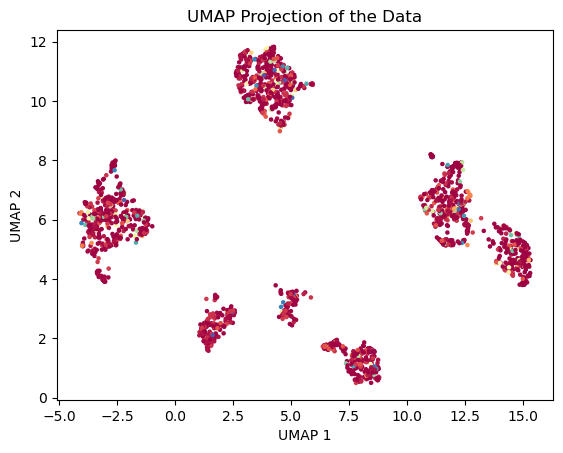

In [33]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt


reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
print("Before UMAP:", np.shape(data_ab_human))  # 确认降维前的数据形状
# 使用UMAP降维
embedding = reducer.fit_transform(data_ab_human)
print("After UMAP:", np.shape(embedding))  # 确认降维后的数据形状
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=labels, cmap='Spectral')
plt.title('Human alpha beta')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [50]:
from sklearn.cluster import KMeans

k = 7
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_AB_human)

# 获取聚类结果
cluster_labels = kmeans.labels_

# 创建字典来存储每个聚类的原始标签集合
clusters = {}
for i in range(len(cluster_labels)):
    cluster_key = cluster_labels[i]
    if cluster_key not in clusters:
        clusters[cluster_key] = set()
    clusters[cluster_key].add(labels[i])

# 打印结果，查看每个聚类中包含的原始标签集合
for key, value in clusters.items():
    print("Cluster", key, ":", len(value))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 6 : 55
Cluster 5 : 67
Cluster 4 : 65
Cluster 0 : 40
Cluster 1 : 21
Cluster 3 : 38
Cluster 2 : 27


In [52]:
# 然后可以使用这个映射来输出更具体的标签信息
for key, value in clusters.items():
    mapped_values = {mapping_dict[v] for v in value}  # 使用集合推导式来映射所有值
    print("Cluster", key, ":", mapped_values)


Cluster 6 : {'FLYALALLL', 'LLLDDFVEI', 'TTDPSFLGRY', 'PTDNYITTY', 'IPTITQMNL', 'VLSFCAFAV', 'RLPGVLPRA', 'RAKFKQLL', 'IVTDFSVIK', 'MEVTPSGTWL', 'RYSIFFDYM', 'PQPELPYPQPQL', 'NTNSSPDDQIGYY', 'LLFGYPVYV', 'CTELKLSDY', 'YVLDHLIVV', 'NLVPMVATV', 'GILGFVFTL', 'VAANIVLTV', 'LLWNGPMAV', 'SVLYYQNNV', 'VYFLQSINF', 'TLKNTVCTV', 'YLLEMLWRL', 'GPRLGVRAT', 'KPYIKWDLL', 'KLQFTSLEI', 'VYAWNRKRI', 'KLVALVINAV', 'LMNVLTLVY', 'WLTNIFGTV', 'KLVALGINAV', 'KLGGALQAK', 'AYAQKIFKI', 'LTDEMIAQY', 'GLCTLVAML', 'YLEPGPVTA', 'RQLLFVVEV', 'RLRAEAQVK', 'FLNGSCGSV', 'ELAGIGILTV', 'QYIKWPWYI', 'IITTDNTFV', 'SPRWYFYYL', 'FSNVTWFHA', 'KLVAMGINAV', 'ILFTRFFYV', 'AVFDRKSDAK', 'TFEYVSQPFLMDLE', 'DATYQRTRALVR', 'ALDPHSGHFV', 'CINGVCWTV', 'YHSIEWA', 'YLQPRTFLL', 'YQDVNCTEV'}
Cluster 5 : {'RLARLALVL', 'GTDLEGNFY', 'TTDPSFLGRY', 'PTDNYITTY', 'SSGDATTAY', 'FTVLCLTPV', 'RLPGVLPRA', 'YVVDDPCPI', 'RAKFKQLL', 'IVTDFSVIK', 'HYNYMCNSSCMGSMN', 'YVDDSSLTI', 'PQPELPYPQPE', 'PGVLLKEFTVSGNIL', 'NLVPMVATV', 'GILGFVFTL', 'RLITGRLQSL', 'PF

In [43]:
import json
print(clusters)

with open('data.json', 'w') as f:
    json.dump(clusters_json_ready, f)

{6: {0, 1, 2, 3, 4, 5, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 142, 143, 146, 150, 24, 25, 26, 154, 153, 30, 32, 33, 34, 35, 36, 37, 39, 40, 42, 45, 46, 47, 48, 49, 58, 73, 81, 95, 103, 105, 107, 108, 114, 116, 118, 120, 122, 123, 124}, 4: {128, 1, 2, 3, 4, 5, 6, 0, 132, 9, 10, 7, 12, 13, 14, 15, 16, 17, 18, 19, 144, 145, 22, 147, 24, 25, 26, 28, 157, 159, 162, 34, 164, 37, 135, 44, 50, 138, 56, 57, 59, 61, 62, 65, 66, 68, 69, 71, 76, 77, 78, 80, 82, 85, 90, 92, 98, 100, 101, 102, 104, 105, 106, 109, 110, 112, 117}, 2: {0, 1, 2, 129, 4, 5, 131, 7, 133, 9, 10, 137, 12, 13, 14, 15, 16, 17, 18, 19, 139, 21, 148, 23, 24, 25, 26, 27, 149, 22, 160, 37, 38, 39, 40, 43, 46, 51, 60, 61, 62, 63, 72, 74, 75, 78, 79, 80, 81, 84, 87, 88, 89, 90, 91, 93, 94, 97, 98, 99, 113, 118, 119, 125, 126}, 5: {0, 1, 2, 130, 4, 129, 134, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 37, 40, 51, 52, 53, 58, 64, 67, 74, 81, 84, 86, 90, 95, 105, 111, 127}, 3: {1, 2, 4, 5, 9, 10, 12, 13, 14, 15, 16, 1

TypeError: Object of type int64 is not JSON serializable

In [25]:
print(cluster_labels)
clusters_data = {}
for i in range(len(cluster_labels)):
    cluster_key = cluster_labels[i]
    if cluster_key not in clusters_data:
        clusters_data[cluster_key] = []
    clusters_data[cluster_key].append(df_AB.iloc[:, 0])

# 打印结果，查看每个聚类中包含的原始标签集合
for key, value in clusters_data.items():
    print("Cluster", key, ":", len(value))

[5 6 1 ... 0 6 3]
Cluster 5 : 347
Cluster 6 : 241
Cluster 1 : 444
Cluster 4 : 228
Cluster 3 : 211
Cluster 2 : 268
Cluster 0 : 257


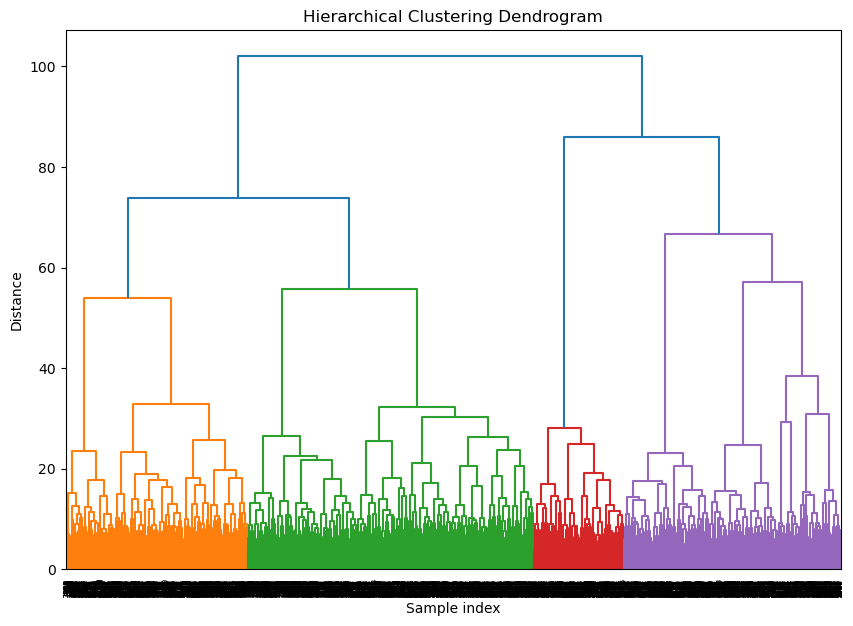

In [12]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(data_beta_human, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [13]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

n_clusters = 8

# 创建SpectralClustering对象
sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', assign_labels='kmeans', random_state=42)

# 执行谱聚类
labels = sc.fit_predict(data_beta_human)

# 可视化聚类结果（仅展示前两维）
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Spectral Clustering of High-Dimensional Data')
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Define a list of datasets
datasets = [df_AA, df_AB, df_BB]

for idx, df in enumerate(datasets[0:1]):

    # Compute t-SNE
    X = df.iloc[:, 13:109]
    print(X)
    components = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(X)
    column_names = ['X', 'Y']
    components = pd.DataFrame(components, columns=column_names)
    df = pd.concat([df, components], axis=1)

    # Perform KMeans clustering
    X = df[["X", "Y"]]
    num_clusters = 8  # Specify the number of clusters
    kmeans = KMeans(n_clusters=num_clusters)  # Initialize KMeans object
    kmeans.fit(X)  # Fit KMeans clustering model to the data
    cluster_labels = kmeans.labels_  # Get cluster labels
    df['Cluster'] = cluster_labels  # Add cluster labels to the DataFrame
    
    # Rename columns
    d = df[[9]] 
    d.columns.values[0] = "epitope"
    df = pd.concat([df, d], axis=1)
    d = df[[5]] 
    d.columns.values[0] = "species"
    df = pd.concat([df, d], axis=1)
    
    # Create a categorical column
    df['Cat'] = df['epitope'].astype('category').cat.codes + 1
    
    # Assign the modified DataFrame back to the original variable
    datasets[idx] = df

# Update the original datasets with the modified datasets
df_AA, df_AB, df_BB = datasets

           13        14        15        16        17        18        19   \
0     0.185993 -0.440178 -0.447695  0.343410  0.446036  0.409746 -0.600459   
1    -0.330413 -0.438601 -0.550938 -0.043808 -0.351609  0.251349  0.534093   
2    -0.330413 -0.438601 -0.550938 -0.043808 -0.351609  0.251349  0.534093   
3    -0.131946 -0.122627  0.180292  0.165555  0.395941 -0.581107  0.161617   
4    -0.330413 -0.438601 -0.550938 -0.043808 -0.351609  0.251349  0.534093   
...        ...       ...       ...       ...       ...       ...       ...   
2390  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2391  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2392  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2393  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2394  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           20        21        22   ...       99        100    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


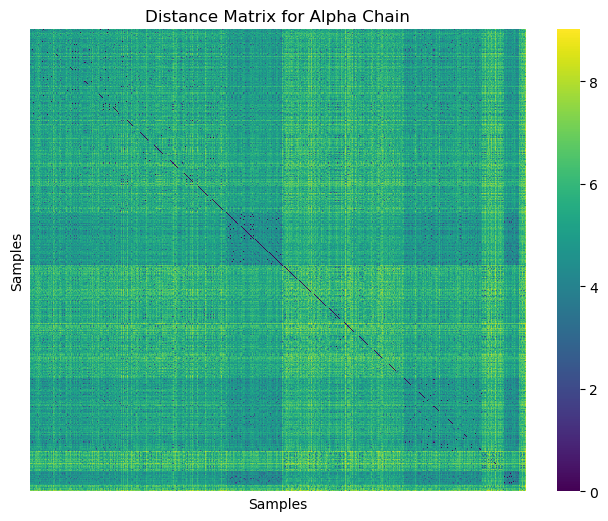

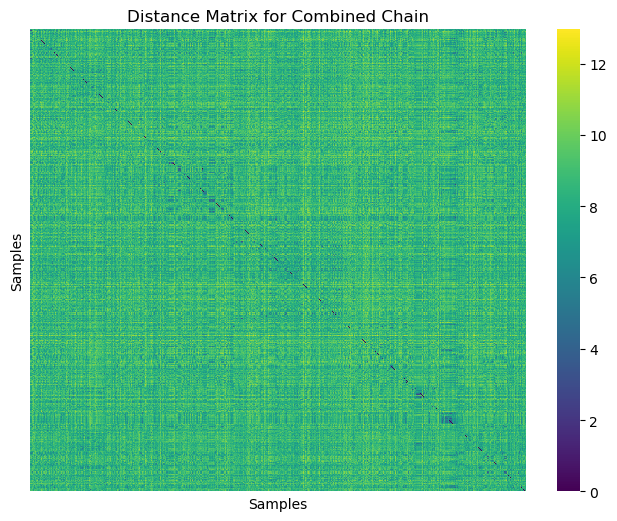

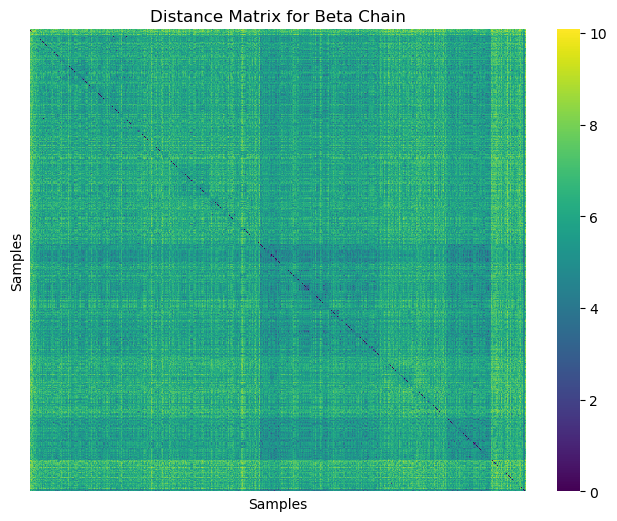

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Define a list of datasets
datasets = [df_AA, df_AB, df_BB]
dataset_names = ['Alpha Chain', 'Combined Chain', 'Beta Chain']

# Iterate over each dataset
for df, name in zip(datasets, dataset_names):
    # Extract the relevant features
    X = df.iloc[:, 13:109]
    
    # Calculate pairwise distances
    distances = pdist(X)
    
    # Convert pairwise distances to a square matrix
    distance_matrix = squareform(distances)
    
    # Plot the distance matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(distance_matrix, cmap='viridis', annot=False, xticklabels=False, yticklabels=False)
    plt.title(f'Distance Matrix for {name}')
    plt.xlabel('Samples')
    plt.ylabel('Samples')
    plt.show()


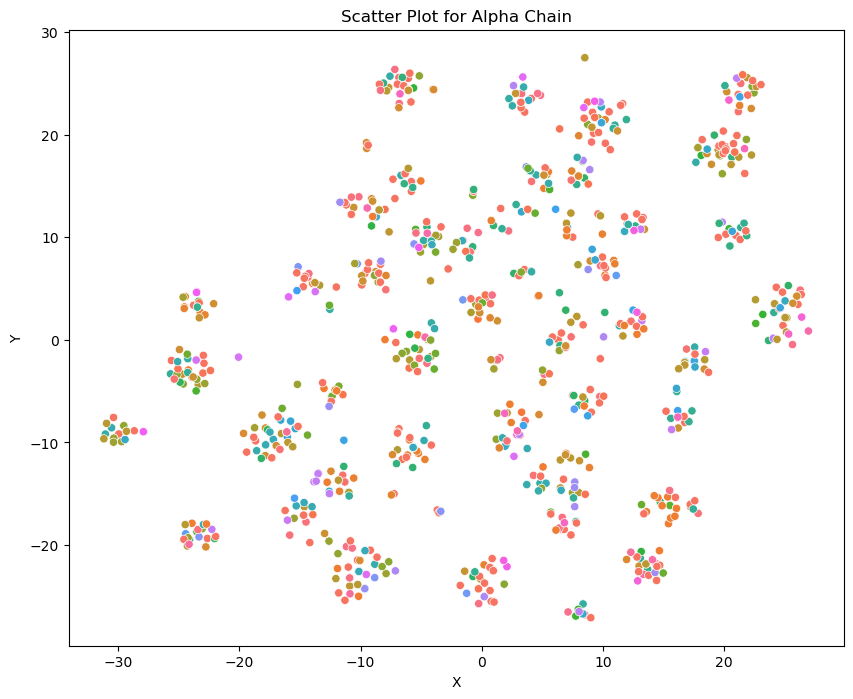

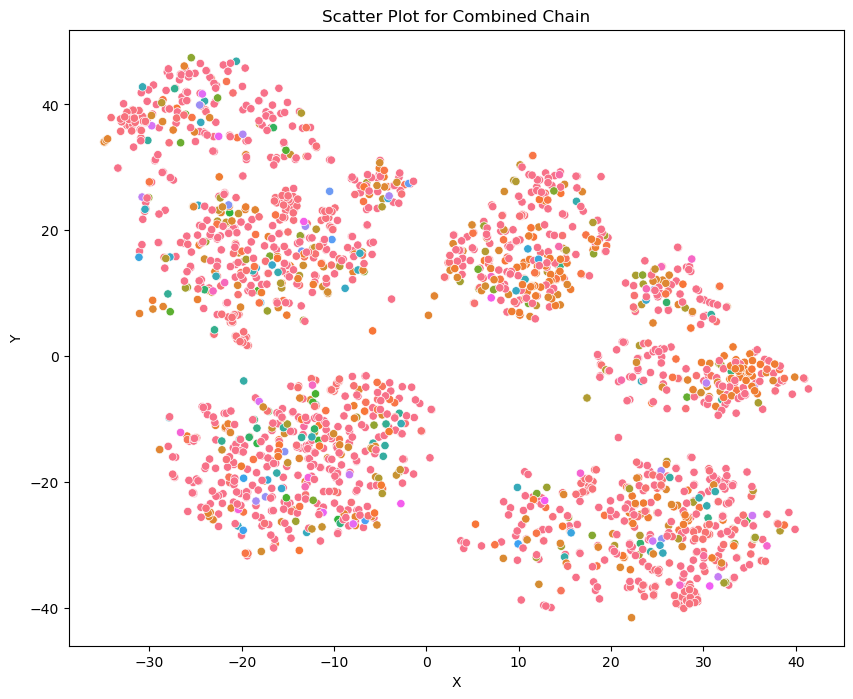

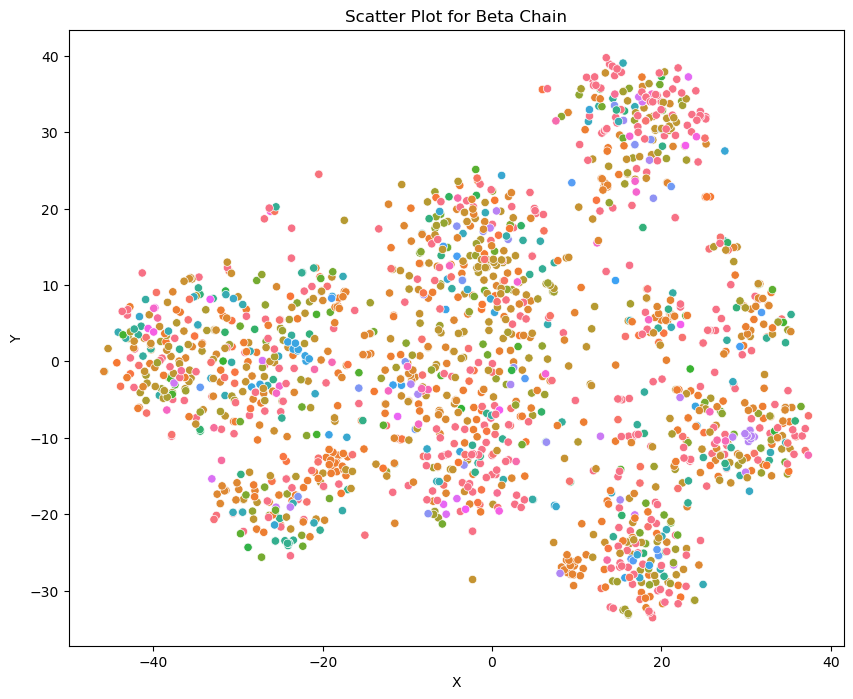

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of datasets
datasets = [df_AA, df_AB, df_BB]
dataset_names = ['Alpha Chain', 'Combined Chain', 'Beta Chain']



# Define the species to select
#all_species = ['MusMusculus', 'HomoSapiens', 'MacacaMulatta', 'Others']
all_species = ['HomoSapiens']

# Define the number of highest occurrences of epitope to select
top_epitope_count = 300  # Change this number as needed

# Iterate over each dataset
for df, name in zip(datasets, dataset_names):
    # Filter the dataset based on selected species
    
    filtered_df = df[df[5].isin(all_species)]
    
    #filtered_df = df[df.iloc[:, 5] == "HomoSapiens"]
    
    
    # Select top epitopes based on occurrence
    top_epitopes = filtered_df['epitope'].value_counts().nlargest(top_epitope_count).index.tolist()
    filtered_df = filtered_df[filtered_df['epitope'].isin(top_epitopes)]
    
    # Create scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=filtered_df, x='X', y='Y', hue="epitope", legend=False)
    plt.title(f'Scatter Plot for {name}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


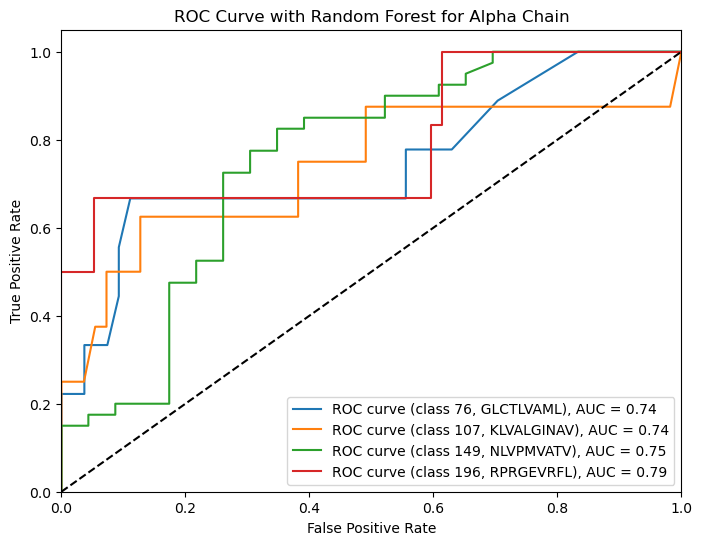

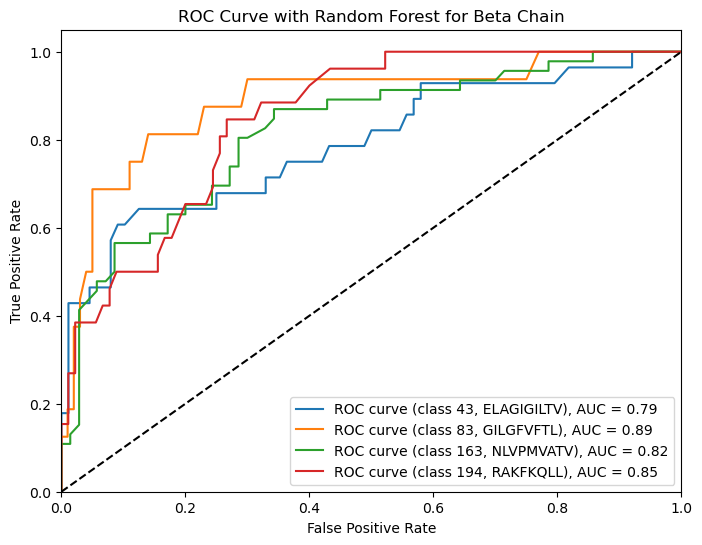

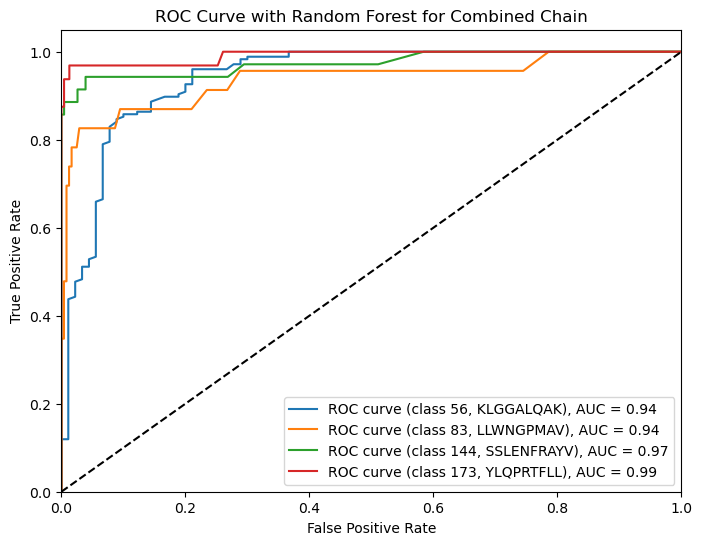

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Define a dictionary to hold DataFrames and their names
dfs = {
    "Alpha Chain": df_AA,
    "Beta Chain": df_BB,
    "Combined Chain": df_AB
}

# Loop through each DataFrame
for name, df_r in dfs.items():
    # X is the features and Y is the target variable
    X = df_r.iloc[:, 13:109]
    Y = df_r["Cat"]
    epitope = df_r["epitope"]

    # Determine the categories with the highest frequency
    top_categories = Y.value_counts().nlargest(4).index.tolist()

    # Filter the data to include only instances corresponding to these categories
    X_top = X[Y.isin(top_categories)]
    Y_top = Y[Y.isin(top_categories)]
    epitope_top = epitope[Y.isin(top_categories)]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test, epitope_train, epitope_test = train_test_split(X_top, Y_top, epitope_top, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities for each class
    y_probs = rf_classifier.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i, category in enumerate(rf_classifier.classes_):
        fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=rf_classifier.classes_)[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for the categories with the highest frequency
    plt.figure(figsize=(8, 6))
    for i, category in enumerate(rf_classifier.classes_):
        if category in top_categories:
            plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {category}, {epitope_test[y_test == category].iloc[0]}), AUC = {roc_auc[i]:.2f}')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve with Random Forest for {name}')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
df_AA

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,X,Y,Cluster,epitope,species,Cat
0,CAAAMDSSYKLIF,TRAV12-2*01,335,TRA,TRAJ12*01,HomoSapiens,HLA-C*08:02:12,B2M,MHCI,GADGVGKSAL,...,-0.608347,0.594359,-0.294738,0.486415,-12.749880,-13.883492,7,GADGVGKSAL,HomoSapiens,69
1,CAAEASNTNKVVF,TRAV4N-4*01,192,TRA,TRAJ34*01,MusMusculus,H-2Eb1,H-2Eb1,MHCII,ADGLAYFRSSFKGG,...,0.149482,0.321768,0.285847,0.684699,5.522552,-9.173800,4,ADGLAYFRSSFKGG,MusMusculus,5
2,CAAEGGGGNKLTF,TRAV13-1*01,27440,TRA,TRAJ10*01,HomoSapiens,HLA-DRB1*04:05,HLA-DRA*01:01,MHCII,HWFVTQRNFYEPQII,...,-0.554163,0.181178,-0.716009,-0.089898,2.212770,10.608275,1,HWFVTQRNFYEPQII,HomoSapiens,92
3,CAAEPSSGQKLVF,TRAV4N-4*01,164,TRA,TRAJ16*01,MusMusculus,H-2Eb1,H-2Eb1,MHCII,ADLIAYLKQATKG,...,-0.608347,0.594359,-0.294738,0.486415,6.161338,11.008335,1,ADLIAYLKQATKG,MusMusculus,6
4,CAAIRSSGSRLTF,TRAV13-1*01,27313,TRA,NaN,HomoSapiens,HLA-DQA*01,HLA-DRB1*07:01,MHCII,LLEFYLAMPFATP,...,-0.608347,0.594359,-0.294738,0.486415,9.793859,7.215709,1,LLEFYLAMPFATP,HomoSapiens,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,CLVGSPVPFSGGYNKLIF,TRAV4*01,629,TRA,TRAJ4*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,-0.119884,0.895657,-0.388549,-0.055234,-2.773688,6.906493,3,NLVPMVATV,HomoSapiens,149
953,CAADTLLNAGGTSYGKLTF,TRAV13-1*01,558,TRA,TRAJ52*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,-0.197778,-0.009423,-0.952306,0.570936,14.421108,-23.453686,0,NLVPMVATV,HomoSapiens,149
954,CALGELAGAGGTSYGKLTF,TRAV19*01,245,TRA,TRAJ52*01,HomoSapiens,HLA-B*35:42:01,B2M,MHCI,IPSINVHHY,...,-0.529570,1.099008,-0.564459,-0.037753,12.861610,-23.491377,0,IPSINVHHY,HomoSapiens,97
955,CILRDIPFDRGSTLGRLYF,TRAV26-2*01,1469,TRA,TRAJ18*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,0.174996,1.309480,0.679144,-0.182673,8.994931,-27.083584,0,NLVPMVATV,HomoSapiens,149
